## Audiobooks "Dashboard"


**After making three dashboards in Python Dash rather than Power BI, I thought I would give Tableau a go<br>
Attempting the Audiobooks Tableau exercise in Udemy's *The Business Intelligence Analyst Course*, I was put off by the phrases**

**- "For some reason, the date fields of the two tables we joined do not match up with each other correctly"**

**- "Sometimes using a join, we’ll do a perfect job, while in other situations, blending will either deliver better or quicker results or be the only solution"**

**So again I thought, to hell with this, I want something I can trust. Rather than going the usual Python Dash route, however, here's my attempt at the exercise in a Jupyter Notebook**

**Import modules**

In [416]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os 
import sys
import datetime
from datetime import datetime
import ipywidgets as widgets
from ipywidgets import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Read in data**

In [417]:
sales = pd.read_csv("Audiobook+sales.csv"); #sales
revs = pd.read_csv("Audiobook+reviews.csv"); #revs

**Merge the datasets**

In [418]:
def JOIN(table1,table2,on,how):
    return pd.merge(table1,table2,on = [on], how = how)

In [419]:
sales_revs = JOIN(sales,revs,'Transaction ID','outer');# sales_revs

**Convert dates to correct format**

- Convert to datetime
- Remove NaNs as don't allow the grouping below
- Split dates into years and months

In [379]:
sales_revs['Review Date'] = pd.to_datetime(sales_revs['Review Date'])
sr = sales_revs[sales_revs['Review Date'] == sales_revs['Review Date']].reset_index(); del sr['index'];#print(sr)
# Just got rid of NaN values as don't allow following grouping
sr['Year'] = sr['Review Date'].astype(str).str[0:4] # Get year and month for slider
sr['Month'] = sr['Review Date'].astype(str).str[5:7] 
sr['Day'] = sr['Review Date'].astype(str).str[8:10] 
#sr

**The following and other data manipulation functions can be found at [https://github.com/steviecurran/SQL2pandas](https://github.com/steviecurran/SQL2pandas)**

In [263]:
def GROUP_AGG2(data,field1,field2,agg_field,agg):
    return data.groupby([field1,field2]).agg(Count=(agg_field,agg)).reset_index()
GROUP_AGG2(sr,'Year','Month','Rating','count') 

,Year,Month,Count
0,2017,01,338
1,2017,02,601
2,2017,03,586
3,2017,04,589
4,2017,05,744
5,2017,06,823
6,2017,07,934
7,2017,08,975
8,2017,09,918
9,2017,10,902


**This gives the correct reviews by month unlike Tableau join, but a dashborad slide may be more useful**

### Performing a Numbers Check 

**Start and End Dates**

In [420]:
start_date= sr['Review Date'].min(); end_date = sr['Review Date'].max(); #start_date
#widgets.DatePicker(description='Start date',disabled=False,value = start_date); #s; #start = s.value
# NICE, BUT WON'T WORK WITH A DATE RANGE 

In [421]:
dates = pd.date_range(start_date, end_date, freq='M'); #print(dates)
options = [(i.strftime('%d %b %Y'), i) for i in dates] # b - SHORT NOTATION FOR MONTH NAME
index = (0, len(options)-1)

d = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Date range:',
    Layout={'width': '800px'},
    disabled=False,
    #continuous_update=True,
    #orientation='horizontal',
    #readout=True
)
d

SelectionRangeSlider(description='Date range:', index=(0, 22), options=(('31 Jan 2017', Timestamp('2017-01-31 …

In [422]:
d1,d2 = d.value

In [423]:
def SELECT_BETWEEN(data,field,entry1,entry2):
    return data[(data[field] >= entry1) & (data[field] <= entry2)]
tmp = SELECT_BETWEEN(sr,'Review Date',d1,d2); #tmp
print("Between %s and %s there are %d reviews" %(d1,d2,len(tmp)))

Between 2017-08-31 00:00:00 and 2018-04-30 00:00:00 there are 4705 reviews


### First Chart

**Plot of number of ratings with date**

In addition to the exercise, have added frequency option (daily or monthly)

In [651]:
sr = sr.sort_values(by='Review Date')
sr['YearMonth'] = sr['Year'] + '-' + sr['Month']

def ratings_plot(freq): 
    if freq == "Daily":
        tmp = sr.groupby(by='Review Date').count(); 
    else:
        tmp = sr.groupby(by='YearMonth').count(); 
    tmp['Date'] = tmp.index
    del tmp['level_0']
    tmp = tmp.reset_index(); 
    tmp['n'] = tmp.index+1
    
    font=12
    plt.rcParams.update({'font.size': font})
    plt.figure(figsize=(10,4))
    ax = plt.gca()
    plt.setp(ax.spines.values(),linewidth=2)
    ax.tick_params(direction='in', pad = 7,length=6, width=1.5, which='major',right=True,top=True)
    ax.tick_params(direction='in', pad = 7,length=3, width=1.5, which='minor',right=True,top=True)
    
    #print(tmp)
    x = tmp['Date']; y = tmp.iloc[:, 1]; rm= tmp.iloc[:, 1].cumsum()/tmp['n']
    
    plt.plot(x,y,c='b',lw = 2)
    plt.plot(x,rm,c='r',lw = 2)
    plt.xticks(rotation=90)
    #ax.set_xlabel("Date", size =font)
    ax.set_ylabel("Number of ratings", size =font)
    plt.tight_layout()
    plt.show() 

In [663]:
f = widgets.Dropdown(options=['Daily','Monthly'],value='Monthly',description='Frequency:', disabled=False)
f

Dropdown(description='Frequency:', index=1, options=('Daily', 'Monthly'), value='Monthly')

<IPython.core.display.Javascript object>


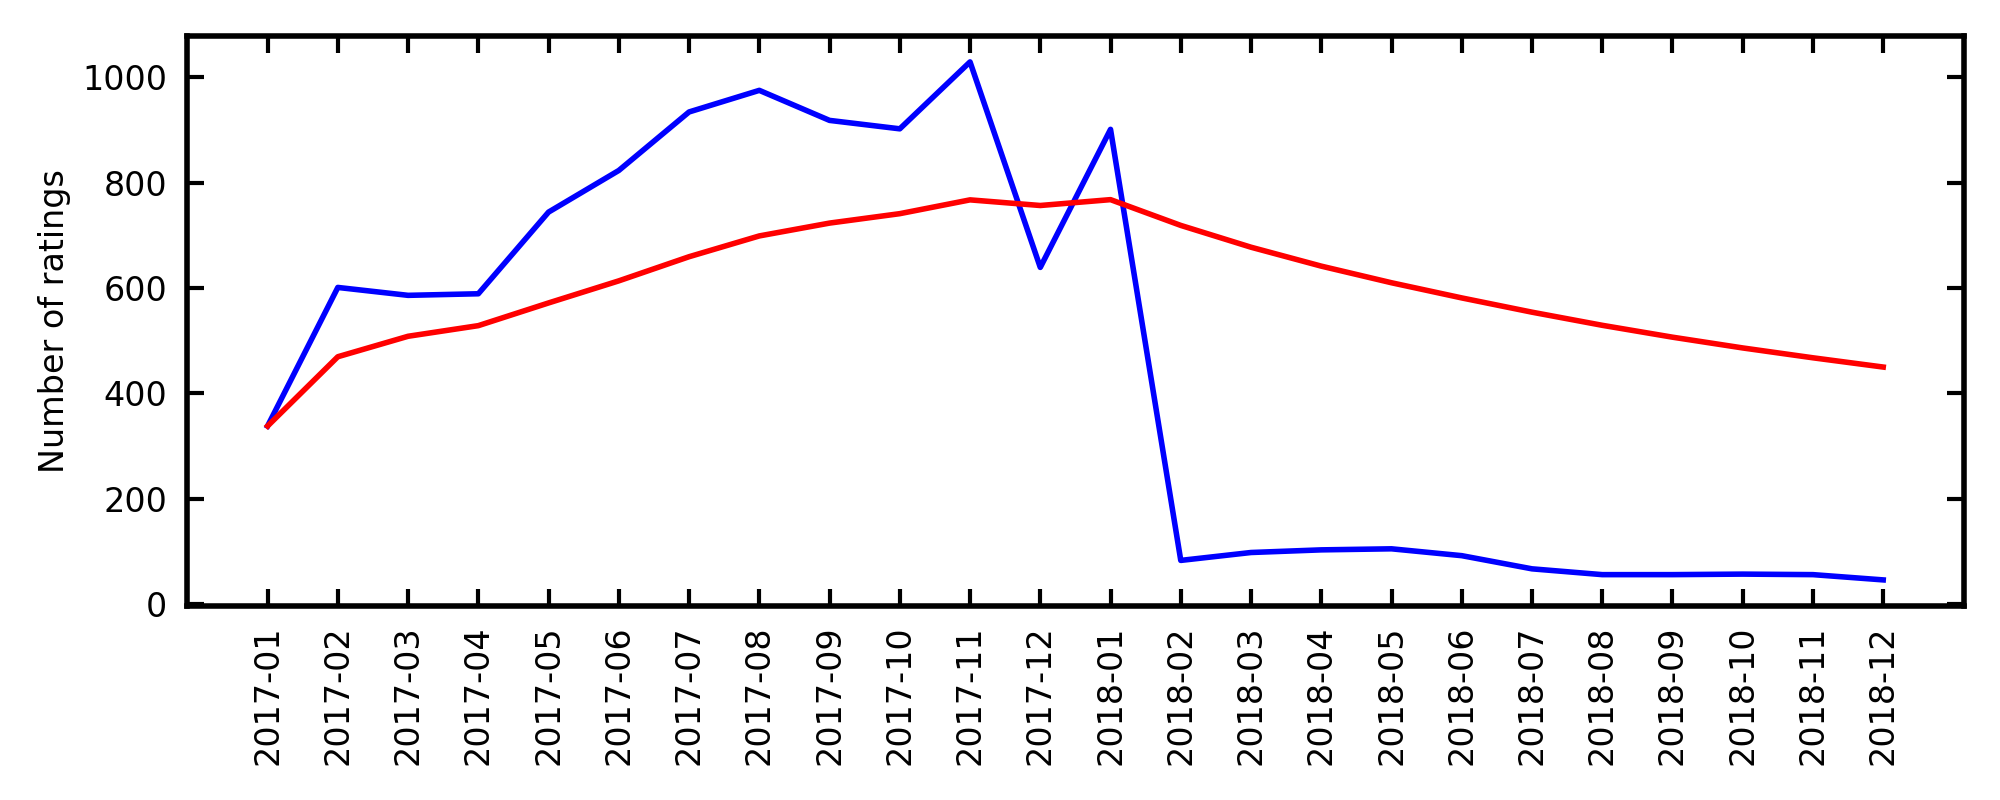

In [664]:
box_layout = Layout(overflow='flexi', #'scroll hidden',
                    #border='3px solid black',
                    width='500px',
                    height='',
                    flex_flow='row',
                    display='flex')
HBox(children=[f,m], layout=box_layout)
ratings_plot(f.value)

<IPython.core.display.Javascript object>


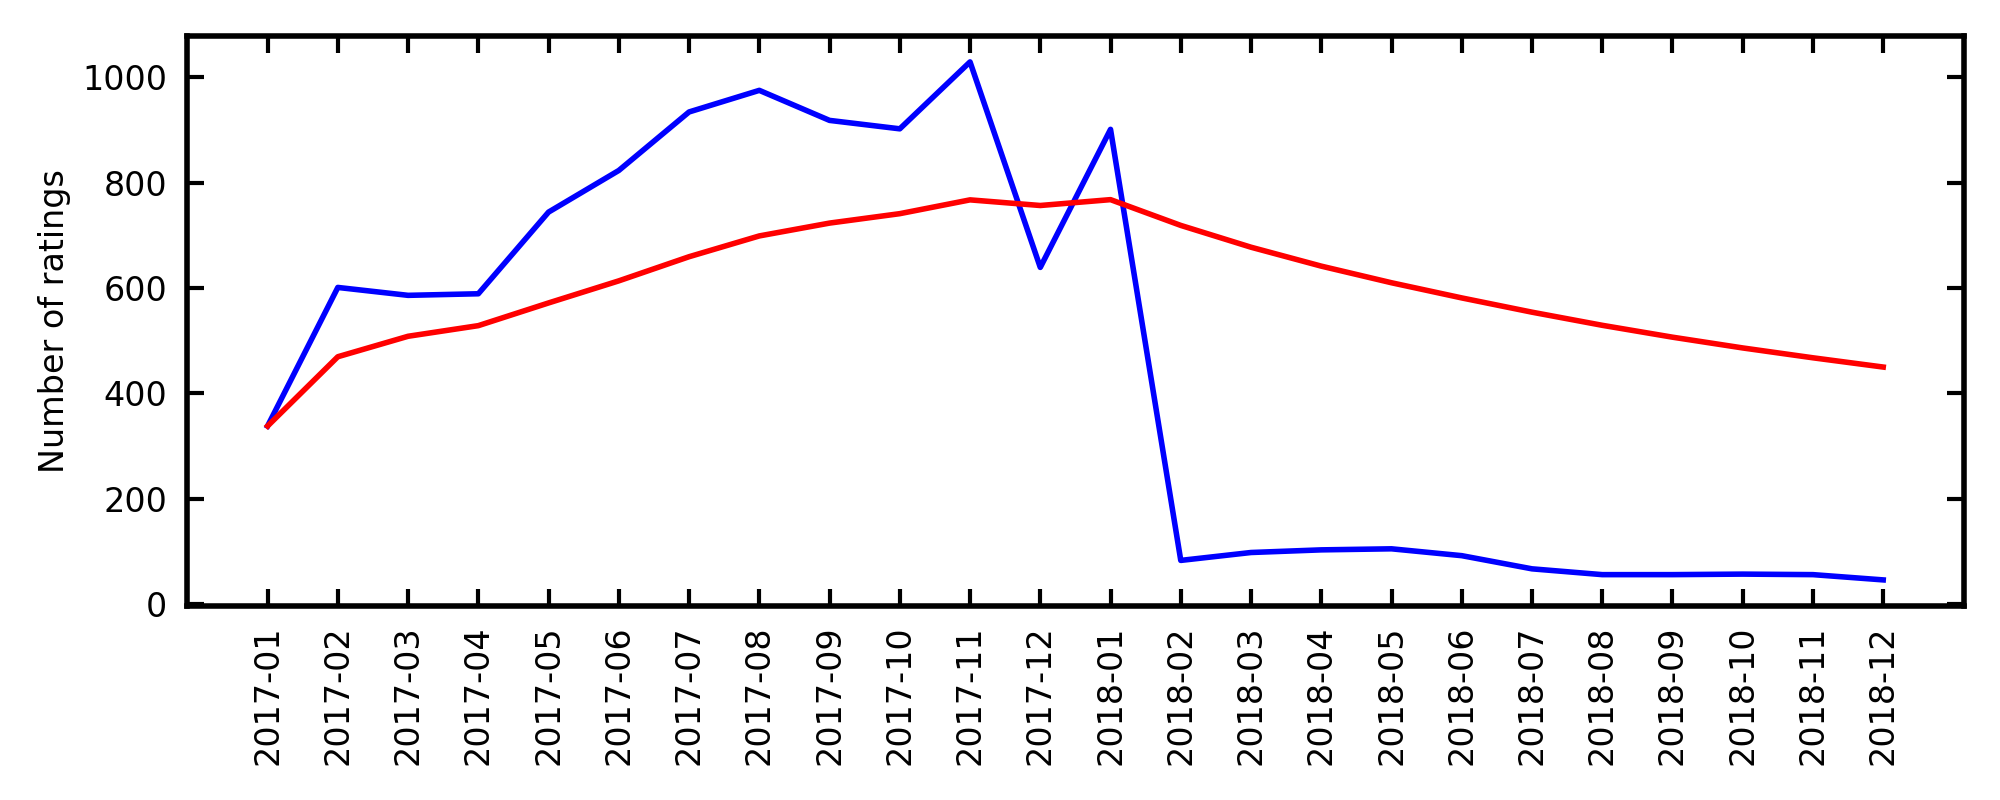

In [632]:
ratings_plot(freq.value,m)

In [654]:
m = widgets.Dropdown(
    options=['Yes', 'No'],
    value='No',
    description='Show running mean:',
    description_width = 'auto',
    disabled=False
)